# Bump Mapping

### Bump Mapping a single scanline
- Shade the surface by manipulating the surface normal based on a raster of surface elevation
- Go along one scanline (increasing s for fixed t)
- Move 1 unit in s, and up the altitude. Gives you change in s, and change in t
- You are responsible for deciding which coordinate system to do this in
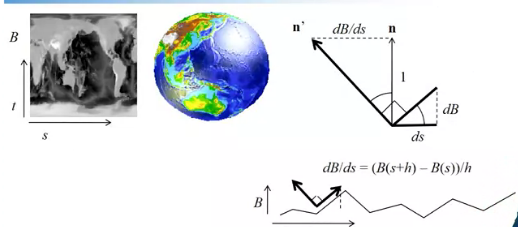

### Arbitrary 2D Bump mapping
- Change in point as s increases, vs change in point as t is increased
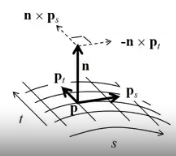
- New normal is equal to
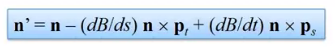

# Environment Mapping

- Allows for implementing reflections as a simple table lookup
- Environment Mapping (Lance Williams)
- Stores the view from a point in all directions
- Use the color of the reflection image at the point the normal maps to in order to obtain the pixel color

### Sphere Map

- Maps a spherical image (gazing ball) of a location to surface normals
- Conversion from surface normal to texture coordinates
- Edges of the spherical image are distorted
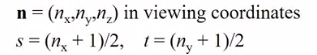

### Cube Map
- Workaround for distortions caused by using the "gazing ball" spherical image
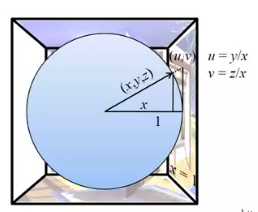

# Texture Shading

- Shading using a table lookup
- Phong Lighting Equation
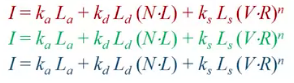
- Avoids computing this at each vertex

- Set texcoords of each vertex to:


- Create a colormap texture image (all the possible colors in the image)
- This mapping of color to a combination of vectors referenced by (s,t) allows for efficient lookups

### Skin textures require a softened approach
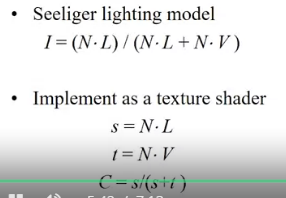

# Visibility

### 3D Depth Cues

- Perspective, texture, occlusion (one object in front of the other)
- Determining which pixel color is the final pixel color

### Painters Algorithm

- Early algorithm for determining visible surfaces
- Bob Ross way. Background polygons first, foreground last

- Steps
1. Backface Culling: Don't draw the triangles on the far side of objects in the viewers line of sight
2. Display polygons in back-to-front ordering: Sort polygons by z value

- This has trouble with cycles of polygons or intersecting surfaces
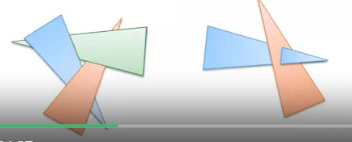

### Quadtree Algorithm
- John Warnock (1969)
- Divides the screen and check the polygons in each subdivision
- Shortcuts out on a single polygon hit
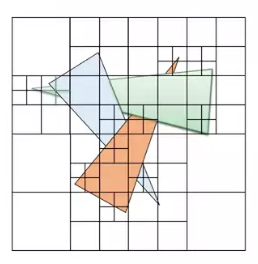

### Z-Buffer (Depth Buffer)

- Uses a minimzation of the distance from the viewer to the first fragment
- Store the depth of each polygon for each pixel
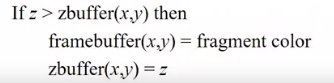
- Z Values are distorted by a perspective transformation, just maintains the ordering
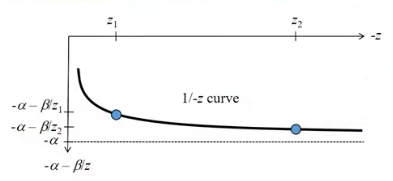
- Don't process z-buffer depths as the true depths

### Normalized Perspective Distortion
- Allows for map your coordinates from [0,1]
- gives a uniform region for depth processing
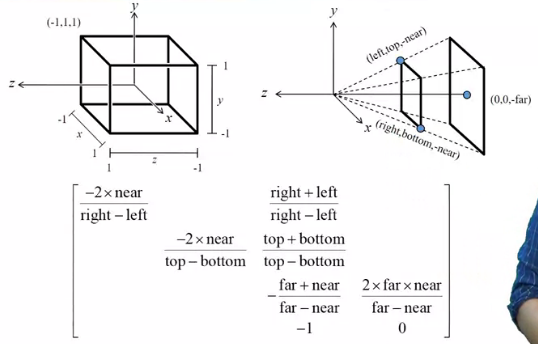

### Hierarchical Z-Buffer

- Creates a mipmap of the Z-Buffer
- average increasing levels of z-buffer, to cull large amounts of geometry
- you need to have a depth ordering already for this, plot the geometry front to back
- opposite of painters algorithm
- much more efficient

# Shadows

- Also a visibility problem, but this time from a light source.
- Illuminated if visible from light source, else in shadow
- Shadows are a powerful depth cue to promote 3D scenes
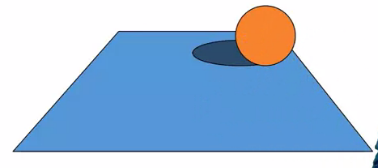

### Perspective Preserves Depth
- Use Z-Buffer to calculate shadows
- Z buffer values are distorted depth
- Shadow buffer algorithm renders scene twice
1. Viewpoint
2. Light position
- Stores both scenes
- If something is occluded from the light source in the depth buffer, instead of culling we cast a shadow on that pixel
- Use a transformation to map pixels in viewpoint to light position projections
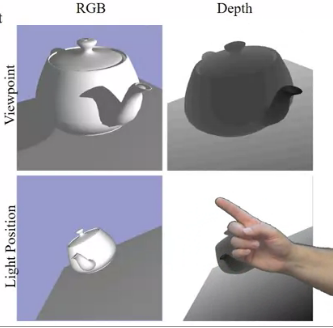

- Render scene twice, one ambient only and one w/ light source
- When rendering from the lights position, only save the z-value of each pixel... its all thats needed
- for each pixel in the frame buffer use transformations inverted to backproject to the right position
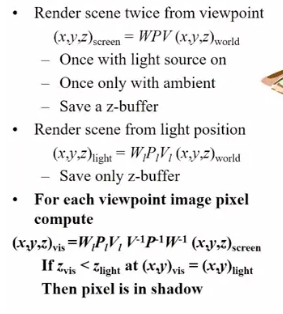



# Ray Tracing

- Ray tracing functionality is built into GPU hardware on newer Nvidia GPUs
- In rasterization, we might use an environment mapped/bump mapped reflection
- Bump map normal enables a lookup into a pregenerated environment map
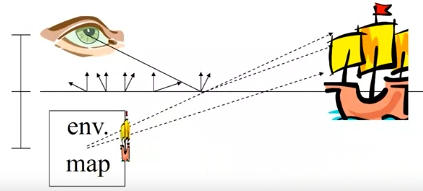
- This method results in some inaccuracies such as mismatched edges, incorrect reflections due to the normal being equivalent in two places or distortion at points on the edge of the environment map (gazing ball distortion)
- Ray tracing allows us to compute true reflections of a vector emitted from a light source or translucent objects

### Ray Tracing vs. Rasterization
- rasterization: for each polygon, for each pixel, render pixel
- ray tracing: for each pixel, for each primitive, render pixel

### Pixels in World Coordinates
- aspect ratio

- focal length

- Using lengths a and d, compute the position of the pixel array
- d is lookat direction (opposite of view vector. eye to lookat point) unitized
- multiply d * focal length to get the position of the center pixel in world coords
- u and v correspond to up and right directions
- therefore the LOWER LEFT PIXEL position:
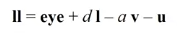
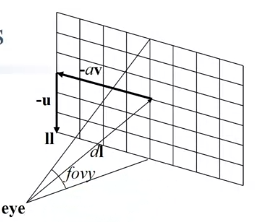

### TraceRay 
- Returns the intensity of light arriving at the rah anchor (o) from the direction (d) (usually unitized)
- Pass that ray to TraceRay, and get back the color
- We compute light back. If everything misses, return the background color
- If we hit something, we execute a recursive operation of TraceRay from this new reflection point up to the depth parameter

### Intersection Computation
- Check if a ray going through a pixel intersects a triangle
- Uses parametric rays, where an implicit object will evaluate to zero
- Plug ray function into implicit surface function
- Ray

- Surface

- Intersection formula


### Sphere intersection
- Easy to ray trace by solving the quadratic equation
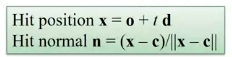
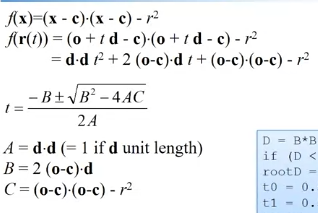
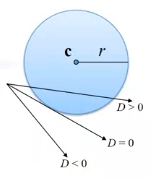

### Shading
- Once you hit the sphere, you can shade it with recursive ray tracing
- Once you hit the sphere, you send a reflection ray, which hits either another object, the background, or the light source
- Don't need the zbuffer because we can send a ray to the light source. If we hit it, illuminated, else shadowed
- Allows for refraction of lenses and glass
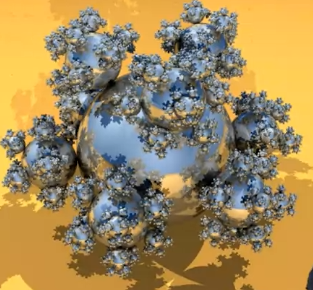

# The Fragment Shader

- Implements complex shading formulas, used for shading pixels (fragments) (before the depth test)
- Fragment shader gives full control over each fragment
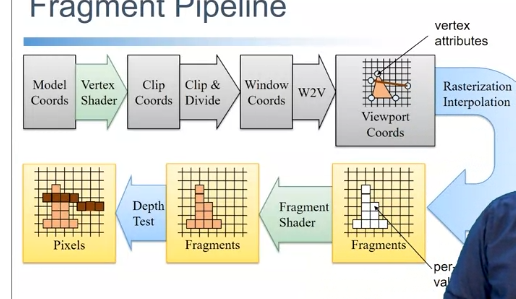

### Fragment functions
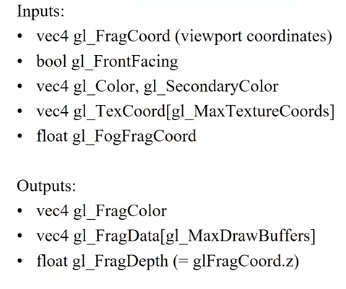

### Functions for variable manipulation
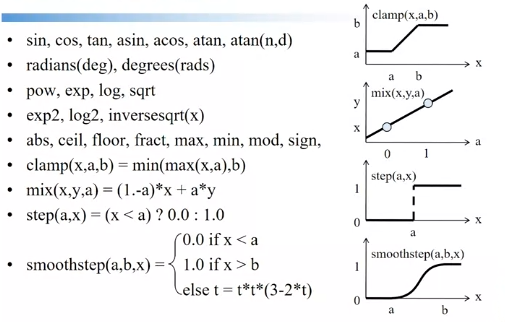

### Vector Math
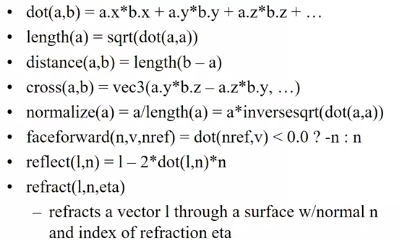

### Specular Reflection
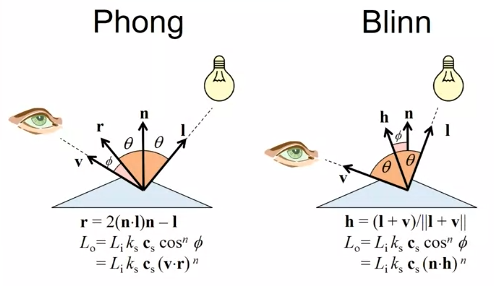

### Attribute Interpolation
- Gouraud uses a normal at start/endpoints and interpolates between
- Phong shading calculates an interpolated normal at each pixel in between
- Linearly interpolating normals stored as vertex attributes, requires you to renormalize the normal to calculate the actual shading